In [68]:
import pandas as pd
import os
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [69]:
os.getcwd()

'C:\\Users\\andyr\\Documents\\file\\side\\projects\\ufc'

In [70]:
os.listdir()

['.ipynb_checkpoints',
 'mmadata.ipynb',
 'most-recent-event.csv',
 'task-dummy.csv',
 'ufc-master.csv',
 'upcoming-event.csv']

In [71]:
path="C:\\Users\\andyr\\Documents\\file\\side\\projects\\ufc"

In [72]:
os.chdir(path)

In [73]:
data=pd.read_csv(os.path.join(path,"ufc-master.csv"))

In [74]:
data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [75]:
crosstab=pd.crosstab(data.finish,data.Winner)

In [76]:
crosstab

Winner,Blue,Red
finish,,
DQ,6,8
KO/TKO,657,838
M-DEC,17,15
Overturned,2,0
S-DEC,226,257
SUB,315,539
U-DEC,722,1056


In [77]:
from scipy.stats import chi2_contingency

In [78]:
_,p,_,_=chi2_contingency(crosstab)

In [79]:
p

0.0013290838326219714

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Columns: 119 entries, R_fighter to b_ko_odds
dtypes: bool(1), float64(58), int64(46), object(14)
memory usage: 4.4+ MB


In [81]:
data.shape

(4896, 119)

In [82]:
data.B_Stance.value_counts()

Orthodox       3680
Southpaw        980
Switch          232
Switch            1
Open Stance       1
Name: B_Stance, dtype: int64

In [83]:
null_values=pd.DataFrame(data.isnull().mean()*100)

In [84]:
null_values

,0
R_fighter,0.000000
B_fighter,0.000000
R_odds,0.020425
B_odds,0.000000
R_ev,0.020425
B_ev,0.000000
date,0.000000
location,0.000000
country,0.000000
Winner,0.000000


In [85]:
data.shape

(4896, 119)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Columns: 119 entries, R_fighter to b_ko_odds
dtypes: bool(1), float64(58), int64(46), object(14)
memory usage: 4.4+ MB


In [87]:
data.date=pd.to_datetime(data.date)

In [88]:
mode={}
median={}
for index,value in zip(null_values.index,null_values[0]):
    
   
    if value>50:
        data=data.drop(index,axis=1)
        
    else:
        if value>0:
            if data[index].dtype=="object":
                mode_=data[index].mode()[0]
                data[index]=data[index].fillna(data[index].mode()[0])
                mode[index]=data[index].mode()[0]
                
            else:
                median_=data[index].median()
                data[index]=data[index].fillna(data[index].median())
                median[index]=data[index].median()
                
            
            
    

In [89]:
median

{'R_odds': -150.0,
 'R_ev': 66.66666667,
 'B_avg_SIG_STR_landed': 24.759615385,
 'B_avg_SIG_STR_pct': 0.45,
 'B_avg_SUB_ATT': 0.2970588235,
 'B_avg_TD_landed': 1.0,
 'B_avg_TD_pct': 0.31,
 'R_avg_SIG_STR_landed': 26.0,
 'R_avg_SIG_STR_pct': 0.451538462,
 'R_avg_SUB_ATT': 0.333333333,
 'R_avg_TD_landed': 1.0,
 'R_avg_TD_pct': 0.33,
 'finish_round': 3.0,
 'total_fight_time_secs': 900.0,
 'r_dec_odds': 250.0,
 'b_dec_odds': 349.0,
 'r_sub_odds': 720.0,
 'b_sub_odds': 975.0,
 'r_ko_odds': 435.0,
 'b_ko_odds': 548.5}

In [90]:
mode

{'B_Stance': 'Orthodox', 'finish': 'U-DEC', 'finish_round_time': '5:00'}

In [91]:
data.shape

(4896, 90)

In [92]:
data.Winner.value_counts()

Red     2859
Blue    2037
Name: Winner, dtype: int64

In [93]:
encoding={}
for i in data.columns:
    
   
    if i=="Winner":
        continue
    if data[i].dtype=="object":
        enc=data.groupby(i).size()/data.shape[0]
        encoding[i]=enc

        data[i]=data[i].apply(lambda x: enc[x])


In [94]:
data.Winner=data.Winner.apply(lambda x: 0 if x=="Red" else 1)

In [95]:
data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,finish,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0.002451,0.000817,-150.0,130,66.666667,130.000000,2021-10-02,0.255515,0.122345,0,False,0.080474,0.895425,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,0.752042,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,0.75817,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,0.265523,0.411765,5.0,0.564338,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,0.002655,0.001838,170.0,-200,170.000000,50.000000,2021-10-02,0.255515,0.122345,1,False,0.169526,0.895425,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,0.752042,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,0.75817,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,0.719363,0.411765,3.0,0.564338,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,0.001634,0.001838,110.0,-130,110.000000,76.923077,2021-10-02,0.255515,0.122345,1,False,0.121119,0.895425,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,0.200163,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,0.75817,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,0.719363,0.098652,3.0,0.564338,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,0.001225,0.000204,-675.0,475,14.814815,475.000000,2021-10-02,0.255515,0.122345,0,False,0.174632,0.895425,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,0.752042,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,0.75817,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,0.719363,0.305351,1.0,0.001430,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,0.000408,0.000613,-135.0,115,74.074074,115.000000,2021-10-02,0.255515,0.122345,1,False,0.174632,0.895425,3,0,2,0,5.22,0.56,0.0,2.54,0.39,2,3,19,0,0,0,4,1,0,0,5,0.752042,175.26,172.72,145,0,4,0,2.64,0.62,0.6,2.85,0.52,4,0,8,0,0,0,2,0,2,0,4,0.75817,175.26,177.80,155,28,33,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.58,-0.6,-0.31,1,1,0.719363,0.098652,3.0,0.564338,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


In [98]:
X=data.drop(["Winner","R_fighter","B_fighter","date"],axis=1)

In [99]:
data.shape

(4896, 90)

In [100]:
y=data["Winner"]

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfe=RFE(RandomForestClassifier(),step=5)

In [103]:
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(), step=5)

In [104]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False,  True,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True])

In [105]:
X.columns

Index(['R_odds', 'B_odds', 'R_ev', 'B_ev', 'location', 'country', 'title_bout',
       'weight_class', 'gender', 'no_of_rounds', 'B_current_lose_streak',
       'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed',
       'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct',
       'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought',
       'B_total_title_bouts', 'B_win_by_Decision_Majority',
       'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous',
       'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms',
       'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak',
       'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed',
       'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct',
       'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought',
       'R_total_title_bouts', 'R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_De

In [106]:
select={}
select_feats=[]
for name,value in zip(X.columns,rfe.support_):
    select[name]=value
    if value==True:
        select_feats.append(name)

In [107]:
select_feats

['R_odds',
 'B_odds',
 'R_ev',
 'B_ev',
 'location',
 'country',
 'weight_class',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_total_rounds_fought',
 'B_Height_cms',
 'B_Reach_cms',
 'R_avg_SIG_STR_landed',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_landed',
 'R_avg_TD_pct',
 'R_total_rounds_fought',
 'R_wins',
 'R_Height_cms',
 'R_Reach_cms',
 'R_age',
 'B_age',
 'win_dif',
 'loss_dif',
 'total_round_dif',
 'height_dif',
 'reach_dif',
 'age_dif',
 'sig_str_dif',
 'avg_sub_att_dif',
 'avg_td_dif',
 'finish',
 'total_fight_time_secs',
 'r_dec_odds',
 'b_dec_odds',
 'r_sub_odds',
 'b_sub_odds',
 'r_ko_odds',
 'b_ko_odds']

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [109]:
X=X[select_feats]

In [110]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [112]:
X.shape,x_train.shape

((4896, 43), (3916, 43))

In [113]:
model=DecisionTreeClassifier(max_depth=3,class_weight="balanced")

model.fit(x_train,y_train)

preds=model.predict(x_test)


print(classification_report(y_test,preds))

preds_train=model.predict(x_train)

print(classification_report(y_train,preds_train))

print(confusion_matrix(y_train,preds_train))

print(confusion_matrix(y_test,preds))

print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       572
           1       0.51      0.64      0.57       408

    accuracy                           0.60       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.62      0.60      0.60       980

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      2287
           1       0.57      0.71      0.63      1629

    accuracy                           0.66      3916
   macro avg       0.66      0.67      0.66      3916
weighted avg       0.68      0.66      0.66      3916

[[1414  873]
 [ 468 1161]]
[[324 248]
 [146 262]]
0.6042952145893322


In [114]:
model=LogisticRegression(class_weight="balanced",max_iter=10000,solver="lbfgs")

model.fit(x_train,y_train)

preds=model.predict(x_test)

print(classification_report(y_test,preds))

preds_train=model.predict(x_train)

print(classification_report(y_train,preds_train))
print(roc_auc_score(y_train,preds_train))

print(confusion_matrix(y_train,preds_train))

print(confusion_matrix(y_test,preds))
print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       572
           1       0.54      0.63      0.58       408

    accuracy                           0.62       980
   macro avg       0.62      0.62      0.62       980
weighted avg       0.63      0.62      0.62       980

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      2287
           1       0.57      0.67      0.62      1629

    accuracy                           0.66      3916
   macro avg       0.65      0.66      0.65      3916
weighted avg       0.67      0.66      0.66      3916

0.6591424881821962
[[1472  815]
 [ 530 1099]]
[[351 221]
 [150 258]]
0.6229946524064172


In [44]:
model=RandomForestClassifier(n_estimators=1000,max_depth=4)

model.fit(x_train,y_train)

preds=model.predict(x_test)

print(classification_report(y_test,preds))

preds_train=model.predict(x_train)
print(roc_auc_score(y_train,preds_train))

print(classification_report(y_train,preds_train))
print(confusion_matrix(y_train,preds_train))

print(confusion_matrix(y_test,preds))
print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       572
           1       0.58      0.44      0.50       408

    accuracy                           0.63       980
   macro avg       0.62      0.60      0.60       980
weighted avg       0.62      0.63      0.62       980

0.6619002217943628
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      2287
           1       0.65      0.52      0.58      1629

    accuracy                           0.69      3916
   macro avg       0.68      0.66      0.66      3916
weighted avg       0.68      0.69      0.68      3916

[[1837  450]
 [ 781  848]]
[[440 132]
 [229 179]]
0.6039781297134238


In [45]:
feat_imp={}

for feat,imp in zip(X.columns,model.feature_importances_):
    feat_imp[feat]=imp
    
    

In [46]:
feat_imp_df=pd.DataFrame(feat_imp,index=range(0,1))

In [47]:
feat_imp_df

,R_odds,B_odds,R_ev,B_ev,location,country,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_total_rounds_fought,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_total_rounds_fought,R_wins,R_Height_cms,R_Reach_cms,R_age,B_age,win_dif,loss_dif,total_round_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,finish,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0.141317,0.170843,0.158223,0.174493,0.003646,0.002212,0.006324,0.005361,0.00429,0.005407,0.002695,0.003083,0.002697,0.003419,0.002406,0.007791,0.00545,0.004065,0.007583,0.005636,0.003879,0.001658,0.003172,0.00308,0.00873,0.005626,0.002531,0.006773,0.004072,0.002019,0.004235,0.013657,0.008315,0.00522,0.011471,0.011298,0.005708,0.021111,0.062264,0.021318,0.020653,0.025545,0.030721


In [48]:
feat_imp_df=pd.melt(feat_imp_df)

In [49]:
feat_imp_df=feat_imp_df.sort_values(by="value",ascending=False)

In [50]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

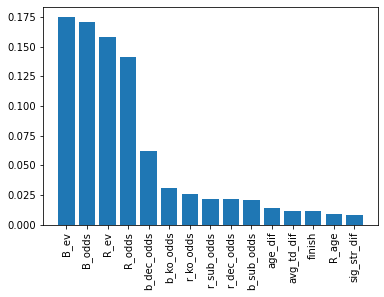

In [51]:
plt.bar(feat_imp_df.head(15).variable,feat_imp_df.head(15).value)
plt.xticks(rotation="vertical")

In [52]:
data

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,finish,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0.002451,0.000817,-150.0,130,66.666667,130.000000,2021-10-02,0.255515,0.122345,0,False,0.080474,0.895425,5,0,1,0,3.420000,0.59,0.700000,0.240000,1.00,4,2,11,0,0,0,1,4,0,0,5,0.752042,198.12,208.28,205,3,0,0,3.950000,0.480000,0.100000,0.610000,0.360,4,8,43,1,0,0,2,11,0,0,13,0.75817,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.530000,0.600000,-0.370000,1,1,0.265523,0.411765,5.0,0.564338,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,0.002655,0.001838,170.0,-200,170.000000,50.000000,2021-10-02,0.255515,0.122345,1,False,0.169526,0.895425,3,2,0,0,5.160000,0.42,0.800000,0.790000,0.22,2,5,24,0,0,0,0,4,2,0,6,0.752042,182.88,193.04,170,2,0,0,2.970000,0.510000,0.500000,2.270000,0.370,4,8,44,0,0,1,3,4,3,0,11,0.75817,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.190000,0.300000,-1.480000,1,1,0.719363,0.411765,3.0,0.564338,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,0.001634,0.001838,110.0,-130,110.000000,76.923077,2021-10-02,0.255515,0.122345,1,False,0.121119,0.895425,3,1,0,0,2.920000,0.41,0.100000,1.150000,0.34,5,5,38,0,0,2,6,1,0,0,9,0.200163,185.42,195.58,185,1,0,0,3.770000,0.490000,1.700000,4.480000,0.440,4,4,13,0,0,0,0,1,5,0,6,0.75817,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.850000,-1.600000,-3.330000,1,1,0.719363,0.098652,3.0,0.564338,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,0.001225,0.000204,-675.0,475,14.814815,475.000000,2021-10-02,0.255515,0.122345,0,False,0.174632,0.895425,3,1,0,0,4.040000,0.34,0.000000,0.000000,0.00,0,1,3,0,0,0,0,0,0,0,0,0.752042,177.80,177.80,155,1,0,0,3.790000,0.360000,0.000000,1.570000,0.350,2,3,15,0,0,0,2,2,0,0,4,0.75817,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.250000,0.000000,-1.570000,1,1,0.719363,0.305351,1.0,0.001430,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,0.000408,0.000613,-135.0,115,74.074074,115.000000,2021-10-02,0.255515,0.122345,1,False,0.174632,0.895425,3,0,2,0,5.220000,0.56,0.000000,2.540000,0.39,2,3,19,0,0,0,4,1,0,0,5,0.752042,175.26,172.72,145,0,4,0,2.640000,0.620000,0.600000,2.850000,0.520,4,0,8,0,0,0,2,0,2,0,4,0.75817,175.26,177.80,155,28,33,0,-2,-2,1,3,11,0,1,-2,0.00,-5.08,5,2.580000,-0.600000,-0.310000,1,1,0.719363,0.098652,3.0,0.564338,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0.000613,0.002042,-155.0,135,64.516129,135.000000,2010-03-21,0.004289,0.500408,1,False,0.174632,0.895

In [53]:
improved = data.drop(["date", "R_fighter","B_fighter","gender","weight_class", "B_Weight_lbs","R_Weight_lbs"],axis=1)

In [54]:
X = improved

In [55]:
y = data["Winner"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [57]:
import numpy as np

In [58]:
model=LogisticRegression()
model.fit(x_train,y_train)
preds=model.predict(x_test)

print(classification_report(y_test,preds))
 
preds_train=model.predict(x_train)

print(classification_report(y_train,preds_train))

print(confusion_matrix(y_train,preds_train))

print(confusion_matrix(y_test,preds))
print(roc_auc_score(y_test,preds))


              precision    recall  f1-score   support

           0       0.67      0.74      0.71       572
           1       0.58      0.50      0.54       408

    accuracy                           0.64       980
   macro avg       0.63      0.62      0.62       980
weighted avg       0.64      0.64      0.64       980

              precision    recall  f1-score   support

           0       0.70      0.78      0.73      2287
           1       0.63      0.52      0.57      1629

    accuracy                           0.67      3916
   macro avg       0.66      0.65      0.65      3916
weighted avg       0.67      0.67      0.67      3916

[[1777  510]
 [ 774  855]]
[[425 147]
 [205 203]]
0.6202780063074181


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
testdata=pd.read_csv(os.path.join(path,"upcoming-event.csv"))

In [116]:
test=testdata[select_feats]

In [117]:
test.finish=test.finish.astype("object")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [118]:
mode

{'B_Stance': 'Orthodox', 'finish': 'U-DEC', 'finish_round_time': '5:00'}

In [119]:
for i in test.columns:
    if test[i].isnull().sum()>0:
        if test[i].dtype=="object":
            test[i]=test[i].fillna(mode[i])
        else:
            test[i]=test[i].fillna(median[i])
        

C:\Users\andyr\AppData\Local\Temp/ipykernel_3384/535192198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=test[i].fillna(mode[i])
C:\Users\andyr\AppData\Local\Temp/ipykernel_3384/535192198.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=test[i].fillna(median[i])


In [120]:
for i in test.columns:
    if test[i].dtype=="object":
        test[i]=test[i].apply(lambda x: encoding[i][x])

C:\Users\andyr\AppData\Local\Temp/ipykernel_3384/3984594079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=test[i].apply(lambda x: encoding[i][x])


In [121]:
encoding.keys()

dict_keys(['R_fighter', 'B_fighter', 'location', 'country', 'weight_class', 'gender', 'B_Stance', 'R_Stance', 'better_rank', 'finish', 'finish_round_time'])

In [122]:
model.predict(test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [124]:
testdata

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Mackenzie Dern,Marina Rodriguez,-195,165,51.282051,165.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,False,Women's Strawweight,FEMALE,5,0,2,2,4.89,0.48,0.1,0.28,0.33,2,1,23,0,0,0,3,2,0,0,5,Orthodox,167.64,165.10,115,0,4,0,3.64,0.38,2.3,0.51,0.10,4,1,13,0,0,1,1,0,4,0,6,Orthodox,162.56,160.02,115,28,34,0,-2,-2,-1,0,10,0,2,-4,5.08,5.08,6,1.25,-2.2,-0.23,1,1,6.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,500,400.0,100,2800.0,900,380.0
1,Randy Brown,Jared Gooden,-265,215,37.735849,215.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,False,Welterweight,MALE,3,0,1,0,5.04,0.42,0.0,0.96,1.00,1,2,7,0,0,0,0,1,0,0,1,Orthodox,182.88,195.58,170,0,1,0,3.72,0.47,0.7,0.98,0.46,2,4,26,0,0,0,2,2,3,0,7,Orthodox,190.50,198.12,170,31,27,0,0,-1,-6,-2,-19,0,-1,-3,-7.62,-2.54,-4,1.32,-0.7,-0.02,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,200,550.0,400,1600.0,215,500.0
2,Tim Elliott,Matheus Nicolau,155,-180,155.000000,55.555556,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,False,Flyweight,MALE,3,0,1,0,3.79,0.52,1.4,1.93,0.44,3,1,13,0,0,2,1,0,1,0,4,Orthodox,167.64,167.64,125,0,2,0,3.35,0.45,1.1,4.01,0.49,2,9,39,1,0,0,5,0,1,0,6,Southpaw,170.18,167.64,125,34,28,0,-1,1,-2,-8,-26,-1,0,0,-2.54,0.00,-6,0.44,0.3,-2.08,1,1,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,Red,NaN,NaN,NaN,NaN,NaN,240,120.0,800,450.0,1600,650.0
3,Sabina Mazo,Mariya Agapova,-190,160,52.631579,160.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,False,Women's Flyweight,FEMALE,3,1,0,0,3.70,0.50,0.6,1.23,0.66,1,2,6,0,0,0,0,0,1,0,1,Southpaw,167.64,172.72,125,1,0,0,6.56,0.44,0.2,0.81,0.80,3,2,15,0,0,1,1,0,1,0,3,Orthodox,170.18,177.80,125,24,24,0,0,-2,-2,0,-9,0,0,0,-2.54,-5.08,0,-2.86,0.4,0.42,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,

In [67]:
test.shape

(9, 43)